In [18]:
# Import required packages
import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [19]:
import pandas as pd

In [20]:
p_df = pd.read_excel('Comprehensive TAGS v6.1.9, 2016-Feb 2019.xlsx',sheet_name="Archive")

In [21]:
p_df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_listed_count,user_verified,user_statuses_count,user_contributors_enabled,user_profile_image_url,user_profile_background_image_url,user_screen_name,user_favourites_count,user_following,possibly_sensitive
0,1099691632423854087,miriammarkfield,RT @jordangreentcb: I filed my stories about t...,Sun Feb 24 15:24:51 +0000 2019,2019-02-24 15:24:51,NaN,en,NaN,NaN,102272618,...,NaN,NaN,305,NaN,http://pbs.twimg.com/profile_images/613115054/...,http://abs.twimg.com/images/themes/theme12/bg.gif,miriammarkfield,1161.0,NaN,NaN
1,1099563032219394049,1st_Reduce_Harm,RT @jordangreentcb: #silentsam https://t.co/55...,Sun Feb 24 06:53:50 +0000 2019,2019-02-24 06:53:50,NaN,en,NaN,NaN,964521738938830848,...,NaN,NaN,818,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,1st_Reduce_Harm,1947.0,NaN,NaN
2,1099726269858631680,SilentSamIAm,RT @jordangreentcb: Antiracists tell neo-Confe...,Sun Feb 24 17:42:29 +0000 2019,2019-02-24 17:42:29,NaN,en,NaN,NaN,913775281881612288,...,2.0,NaN,2665,NaN,http://pbs.twimg.com/profile_images/1100091256...,NaN,SilentSamIAm,2585.0,NaN,NaN
3,1099629537028071424,IGD_News,RT @adaure: Drowned out by the chants of “go h...,Sun Feb 24 11:18:06 +0000 2019,2019-02-24 11:18:06,NaN,en,NaN,NaN,3289440085,...,691.0,NaN,35727,NaN,http://pbs.twimg.com/profile_images/9867907451...,http://abs.twimg.com/images/themes/theme1/bg.png,IGD_News,22187.0,NaN,NaN
4,1099633891390951425,tartnyc,RT @jordangreentcb: Antiracists tell neo-Confe...,Sun Feb 24 11:35:24 +0000 2019,2019-02-24 11:35:24,NaN,en,NaN,NaN,159617463,...,174.0,NaN,35618,NaN,http://pbs.twimg.com/profile_images/7060132255...,http://abs.twimg.com/images/themes/theme1/bg.png,tartnyc,37056.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59249,695076381097594880,WilsonforSBP,A: What will you do to support the students in...,Thu Feb 04 02:48:17 +0000 2016,2016-02-04 02:48:17,NaN,en,NaN,NaN,4711040003,...,NaN,NaN,183,NaN,http://pbs.twimg.com/profile_images/6917414376...,NaN,WilsonforSBP,34.0,NaN,NaN
59250,717876586234642432,viejas46,@RealGlenMacnow That would be like #SilentSam.,Thu Apr 07 00:48:10 +0000 2016,2016-04-07 01:48:10,NaN,en,963038778.0,RealGlenMacnow,39248138,...,62.0,NaN,15863,NaN,http://pbs.twimg.com/profile_images/1931035440...,http://abs.twimg.com/images/themes/theme1/bg.png,viejas46,1505.0,NaN,NaN
59251,725473895881531392,LokoVybe,Bout to have #shot of some #SilentSam and munc...,Wed Apr 27 23:57:10 +0000 2016,2016-04-28 00:57:10,NaN,en,NaN,NaN,524000395,...,3.0,NaN,115,NaN,http://pbs.twimg.com/profile_images/4492328506...,http://abs.twimg.com/images/themes/theme1/bg.png,LokoVybe,NaN,NaN,NaN
59252,708729711300489216,haley_nm,I apologize to anyone that I was talking to la...,Sat Mar 12 19:01:45 +0000 2016,2016-03-12 19:01:45,NaN,en,NaN,NaN,327822558,...,1.0,NaN,2387,NaN,http://pbs.twimg.com/profile_images/8313639137...,http://abs.twimg.com/images/themes/theme1/bg.png,haley_nm,34080.0,NaN,NaN


In [22]:
docs =array(p_df['text'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 11607
Number of documents: 59254
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1)]]


In [11]:
num_topics = 10
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

In [12]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.067*"chapel_hill" + 0.058*"north_carolina" + 0.035*"redtraccoon_silent" + 0.030*"white_supremacy" + 0.029*"need_come" + 0.027*"support_100" + 0.024*"chapel" + 0.024*"carolina" + 0.024*"north" + 0.023*"hill"'), (1, '0.042*"statue" + 0.031*"sarah_willets" + 0.025*"silent" + 0.025*"down" + 0.022*"protester" + 0.020*"support" + 0.019*"redtraccoon" + 0.016*"protesting" + 0.016*"around" + 0.015*"student"'), (2, '0.068*"police" + 0.054*"rally" + 0.044*"memorial" + 0.030*"officer" + 0.029*"protest" + 0.029*"night" + 0.025*"movement_doesn" + 0.023*"last_night" + 0.016*"handed_infiltrating" + 0.016*"officer_caught"'), (3, '0.106*"silencesam" + 0.052*"remove" + 0.044*"removed" + 0.042*"torn_down" + 0.037*"wralsarah_breaking" + 0.036*"tonight" + 0.034*"torn" + 0.031*"say" + 0.022*"statement" + 0.019*"breaking"'), (4, '0.039*"move_silent_sam" + 0.027*"down" + 0.025*"with" + 0.024*"student" + 0.024*"statue" + 0.023*"that" + 0.023*"this" + 0.018*"about" + 0.017*"monument" + 0.017*"history"'),

In [23]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.38711335454707285


In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [35]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=16, step=2)
# Show graph

In [36]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import seaborn as sns
sns.set_style("darkgrid")

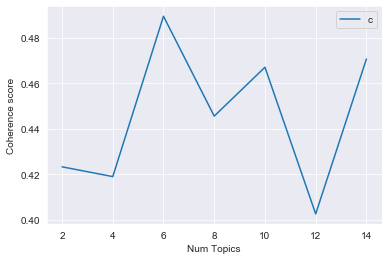

In [39]:
limit=16; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
model_list[4]

In [41]:
best=model_list[4]

In [42]:
best.get_document_topics

<bound method LdaModel.get_document_topics of <gensim.models.ldamodel.LdaModel object at 0x2B547400>>

In [43]:
best.print_topics()

[(0,
  '0.031*"statue" + 0.029*"redtraccoon" + 0.022*"wral" + 0.018*"wralsarah" + 0.016*"will" + 0.014*"tear" + 0.013*"say" + 0.013*"still" + 0.013*"history" + 0.013*"monument"'),
 (1,
  '0.062*"chapel_hill" + 0.052*"move_silent_sam" + 0.029*"rymiko_long" + 0.026*"protest" + 0.023*"chapel" + 0.023*"hill" + 0.022*"need_come" + 0.022*"student" + 0.021*"this" + 0.019*"support_100"'),
 (2,
  '0.034*"down" + 0.026*"come_down" + 0.023*"torn_down" + 0.022*"they" + 0.021*"torn" + 0.021*"that" + 0.020*"wralsarah_breaking" + 0.014*"memorial" + 0.014*"university" + 0.014*"statue"'),
 (3,
  '0.029*"white_supremacy" + 0.021*"white" + 0.018*"white_supremacist" + 0.018*"yesyoureracist_proud" + 0.017*"statue" + 0.016*"needed_come" + 0.016*"yesyoureracist_case" + 0.015*"that" + 0.015*"yesyoureracist" + 0.014*"take"'),
 (4,
  '0.032*"rally" + 0.031*"riot_gear" + 0.030*"every" + 0.025*"done" + 0.024*"photo" + 0.022*"photo_retweeted" + 0.021*"nazi" + 0.020*"then" + 0.020*"crowd_chanting" + 0.019*"leading"

In [107]:
from gensim.test.utils import datapath
temp_file = datapath("model")

In [110]:
temp_file

'c:\\users\\reich\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\gensim\\test\\test_data\\model'

In [109]:
best.save(temp_file)

In [44]:
import pyLDAvis

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best, corpus, dictionary=best.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.148155 -0.016729       1        1  13.257683
2      0.087569 -0.115249       2        1  12.255210
5     -0.048719  0.361090       3        1  11.916241
0      0.136942 -0.033585       4        1  11.220780
3      0.060779 -0.154767       5        1  11.220399
8      0.117726 -0.072342       6        1  10.620240
9      0.055076  0.060205       7        1   9.774336
7      0.076077  0.089292       8        1   9.711547
4     -0.342495 -0.160558       9        1   5.117485
6     -0.291110  0.042645      10        1   4.906083, topic_info=                   Term          Freq         Total Category  logprob  loglift
245      north_carolina  13240.000000  13240.000000  Default  30.0000  30.0000
22          chapel_hill  12865.000000  12865.000000  Default  29.0000  29.0000
57            protester  10361.000000  10361.000000  Default  28.0000  28.0000
1322    move_silent_sam  10721.000000  10721.000000  Default  27.0000  27.0000
3723        their_party   8513.000000   8513.000000  Default  26.0000  26.0000
...                 ...           ...           ...      ...      ...      ...
784                join    947.182556   1117.104126  Topic10  -4.3969   2.8497
480             defense    940.039673   2110.301758  Topic10  -4.4044   2.2060
229                they   1009.792725   7059.899414  Topic10  -4.3329   1.0700
3293  counter_protester    600.510681    800.803223  Topic10  -4.8526   2.7269
1078          make_zero    618.774231   1873.167480  Topic10  -4.8226   1.9070

[537 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
6946       1  0.953406             100
6946       7  0.042866             100
10336      8  0.998040      65m8klbtb3
2361       8  0.996724  _blackcongress
786        7  0.997945           abc11
...      ...       ...             ...
240        6  0.065730            your
240        8  0.075188            your
240       10  0.000473            your
1079       9  0.997792            zero
9166       5  0.997790      zezhwj5yuk

[1101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 6, 1, 4, 9, 10, 8, 5, 7])

In [48]:
pyLDAvis.save_html(vis, 'lda.html')


In [28]:
best.print_topics()

[(0,
  '0.033*"chapel_hill" + 0.019*"this" + 0.017*"statue" + 0.016*"student" + 0.015*"silencesam" + 0.014*"white_supremacy" + 0.012*"chapel" + 0.012*"hill" + 0.012*"about" + 0.011*"from"'),
 (1,
  '0.046*"yesyoureracist_proud" + 0.031*"legal_defense" + 0.030*"donating_freedom" + 0.030*"take_rightful" + 0.030*"these_other" + 0.030*"place_consider" + 0.029*"take" + 0.026*"proud" + 0.020*"activist" + 0.015*"fighter"'),
 (2,
  '0.020*"statue" + 0.017*"place" + 0.016*"history" + 0.014*"maya_little" + 0.013*"little" + 0.013*"racist" + 0.012*"figure" + 0.011*"that" + 0.010*"good" + 0.009*"silent"'),
 (3,
  '0.048*"sarah_willets" + 0.041*"support_100" + 0.027*"protest_underway" + 0.027*"protesting" + 0.022*"student" + 0.019*"prominent" + 0.019*"campusy_unc" + 0.015*"down" + 0.014*"av3ejmvnsv" + 0.014*"redtraccoon_silent_protest_underway"'),
 (4,
  '0.041*"confederate_soldier" + 0.026*"need_come" + 0.023*"soldier" + 0.018*"yesyoureracist" + 0.018*"needed_come" + 0.017*"yesyoureracist_case" + 0

In [49]:
best[corpus]

In [50]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=p_df):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [51]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=best, corpus=corpus, texts=p_df.text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [52]:
# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.5163,"about, people, silencesam, statue, this, proud...",RT @jordangreentcb: I filed my stories about t...
1,1,0.0,0.5497,"statue, redtraccoon, wral, wralsarah, will, te...",RT @jordangreentcb: #silentsam https://t.co/55...
2,2,1.0,0.5694,"chapel_hill, move_silent_sam, rymiko_long, pro...",RT @jordangreentcb: Antiracists tell neo-Confe...
3,3,6.0,0.4819,"protester, dems, freedom, fighter, stop, prote...",RT @adaure: Drowned out by the chants of “go h...
4,4,1.0,0.5693,"chapel_hill, move_silent_sam, rymiko_long, pro...",RT @jordangreentcb: Antiracists tell neo-Confe...
...,...,...,...,...,...
59249,59249,1.0,0.6559,"chapel_hill, move_silent_sam, rymiko_long, pro...",A: What will you do to support the students in...
59250,59250,2.0,0.7750,"down, come_down, torn_down, they, torn, that, ...",@RealGlenMacnow That would be like #SilentSam.
59251,59251,3.0,0.5329,"white_supremacy, white, white_supremacist, yes...",Bout to have #shot of some #SilentSam and munc...
59252,59252,9.0,0.6415,"north_carolina, redtraccoon_silent, carolina, ...",I apologize to anyone that I was talking to la...


In [53]:
with_topics=pd.merge(p_df, df_dominant_topic.loc[:,['Dominant_Topic','Topic_Perc_Contrib','Keywords']],how="left" ,left_index=True,right_index=True)

In [54]:
with_topics

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_contributors_enabled,user_profile_image_url,user_profile_background_image_url,user_screen_name,user_favourites_count,user_following,possibly_sensitive,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,1099691632423854087,miriammarkfield,RT @jordangreentcb: I filed my stories about t...,Sun Feb 24 15:24:51 +0000 2019,2019-02-24 15:24:51,NaN,en,NaN,NaN,102272618,...,NaN,http://pbs.twimg.com/profile_images/613115054/...,http://abs.twimg.com/images/themes/theme12/bg.gif,miriammarkfield,1161.0,NaN,NaN,8.0,0.5163,"about, people, silencesam, statue, this, proud..."
1,1099563032219394049,1st_Reduce_Harm,RT @jordangreentcb: #silentsam https://t.co/55...,Sun Feb 24 06:53:50 +0000 2019,2019-02-24 06:53:50,NaN,en,NaN,NaN,964521738938830848,...,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,1st_Reduce_Harm,1947.0,NaN,NaN,0.0,0.5497,"statue, redtraccoon, wral, wralsarah, will, te..."
2,1099726269858631680,SilentSamIAm,RT @jordangreentcb: Antiracists tell neo-Confe...,Sun Feb 24 17:42:29 +0000 2019,2019-02-24 17:42:29,NaN,en,NaN,NaN,913775281881612288,...,NaN,http://pbs.twimg.com/profile_images/1100091256...,NaN,SilentSamIAm,2585.0,NaN,NaN,1.0,0.5694,"chapel_hill, move_silent_sam, rymiko_long, pro..."
3,1099629537028071424,IGD_News,RT @adaure: Drowned out by the chants of “go h...,Sun Feb 24 11:18:06 +0000 2019,2019-02-24 11:18:06,NaN,en,NaN,NaN,3289440085,...,NaN,http://pbs.twimg.com/profile_images/9867907451...,http://abs.twimg.com/images/themes/theme1/bg.png,IGD_News,22187.0,NaN,NaN,6.0,0.4819,"protester, dems, freedom, fighter, stop, prote..."
4,1099633891390951425,tartnyc,RT @jordangreentcb: Antiracists tell neo-Confe...,Sun Feb 24 11:35:24 +0000 2019,2019-02-24 11:35:24,NaN,en,NaN,NaN,159617463,...,NaN,http://pbs.twimg.com/profile_images/7060132255...,http://abs.twimg.com/images/themes/theme1/bg.png,tartnyc,37056.0,NaN,NaN,1.0,0.5693,"chapel_hill, move_silent_sam, rymiko_long, pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59249,695076381097594880,WilsonforSBP,A: What will you do to support the students in...,Thu Feb 04 02:48:17 +0000 2016,2016-02-04 02:48:17,NaN,en,NaN,NaN,4711040003,...,NaN,http://pbs.twimg.com/profile_images/6917414376...,NaN,WilsonforSBP,34.0,NaN,NaN,1.0,0.6559,"chapel_hill, move_silent_sam, rymiko_long, pro..."
59250,717876586234642432,viejas46,@RealGlenMacnow That would be like #SilentSam.,Thu Apr 07 00:48:10 +0000 2016,2016-04-07 01:48:10,NaN,en,963038778.0,RealGlenMacnow,39248138,...,NaN,http://pbs.twimg.com/profile_images/1931035440...,http://abs.twimg.com/images/themes/theme1/bg.png,viejas46,1505.0,NaN,NaN,2.0,0.7750,"down, come_down, torn_down, they, torn, that, ..."
59251,725473895881531392,LokoVybe,Bout to have #shot of some #SilentSam and munc...,Wed Apr 27 23:57:10 +0000 2016,2016-04-28 00:57:10,NaN,en,NaN,NaN,524000395,...,NaN,http://pbs.twimg.com/profile_images/4492328506...,http://abs.twimg.com/images/themes/theme1/bg.png,LokoVybe,NaN,NaN,NaN,3.0,0.5329,"white_supremacy, white, white_supremacist, yes..."
59252,708729711300489216,haley_nm,I apologize to anyone that I was talking to la...,Sat Mar 12 19:01:45 +0000 2016,2016-03-12 19:01:45,NaN,en,NaN,NaN,327822558,...,NaN,http://pbs.twimg.com/profile_images/8313639137...,http://abs.twimg.com/images/themes/theme1/bg.png,haley_nm,34080.0,NaN,NaN,9.0,0.6415,"north_carolina, redtraccoon_silent, carolina, ..."


In [55]:
with_topics.to_csv("with_topics.csv")

In [62]:
with_top_no_du=with_topics.drop_duplicates('text')


In [100]:
with_top_no_du.to_csv("with_topics_no_dups.csv")

In [89]:
with_top_no_du.retweet_count.describe()

count    11416.000000
mean         9.644797
std         57.988637
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       2566.000000
Name: retweet_count, dtype: float64

In [101]:
# tweets that have more than 10 rts and ranked as the top 10 most distinctive tweets within each group
viral_distinct_top10=with_top_no_du.loc[with_top_no_du[with_top_no_du.retweet_count>10].groupby('Dominant_Topic')['Topic_Perc_Contrib'].nlargest(10).reset_index().level_1]

In [102]:
viral_distinct_top10.to_csv("most_dist_tweets_with_10+RT.csv")

In [106]:
viral_list=viral_distinct_top10.index.tolist()

<function sum(iterable, /, start=0)>

In [144]:
import random
random.seed(9001)

AttributeError: module 'random' has no attribute 'seed'

In [149]:
non_viral_notsodistinct=with_top_no_du.drop(viral_list).groupby('Dominant_Topic').apply(lambda x: x.loc[((x['Topic_Perc_Contrib']>0.6)&(x['Topic_Perc_Contrib']<0.8))].sample(10))

In [160]:
contrast_table=pd.concat([non_viral_notsodistinct.reset_index(drop=True),viral_distinct_top10]).sort_values(['Dominant_Topic','Topic_Perc_Contrib'],ascending=False)

In [161]:
contrast_table.to_csv("topics_sampled.csv")

In [80]:
with_top_no_du.loc[with_top_no_du.groupby('Dominant_Topic')['Topic_Perc_Contrib'].nlargest(10).reset_index().level_1]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_contributors_enabled,user_profile_image_url,user_profile_background_image_url,user_screen_name,user_favourites_count,user_following,possibly_sensitive,Dominant_Topic,Topic_Perc_Contrib,Keywords
286,1095651013019734016,Prof_Kennedy,RT @CbCeditorial: 'Blackface meets whitewash i...,Wed Feb 13 11:48:52 +0000 2019,2019-02-13 11:48:52,NaN,en,NaN,NaN,247975042,...,NaN,http://pbs.twimg.com/profile_images/1089333235...,http://abs.twimg.com/images/themes/theme1/bg.png,Prof_Kennedy,4078.0,NaN,NaN,0.0,0.9535,"statue, redtraccoon, wral, wralsarah, will, te..."
912,1093467755423113216,CbCeditorial,Blackface meets whitewash in N.C.' -- Latest f...,Thu Feb 07 11:13:23 +0000 2019,2019-02-07 11:13:23,NaN,en,NaN,NaN,745242816113164288,...,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,CbCeditorial,54.0,NaN,NaN,0.0,0.9509,"statue, redtraccoon, wral, wralsarah, will, te..."
5734,1075812406910013440,newsobserver,RT @john_drescher: OPINION. Thirty years from ...,Thu Dec 20 17:57:20 +0000 2018,2018-12-20 17:57:20,NaN,en,NaN,NaN,8942262,...,NaN,http://pbs.twimg.com/profile_images/5859657262...,http://abs.twimg.com/images/themes/theme1/bg.png,newsobserver,1199.0,NaN,NaN,0.0,0.9471,"statue, redtraccoon, wral, wralsarah, will, te..."
1804,1093158225015459840,LAPhilip,"Thanks for sharing, @JaneStancill: A parody ti...",Wed Feb 06 14:43:25 +0000 2019,2019-02-06 14:43:25,NaN,en,NaN,NaN,1938764240,...,NaN,http://pbs.twimg.com/profile_images/1006975217...,http://abs.twimg.com/images/themes/theme1/bg.png,LAPhilip,888.0,NaN,NaN,0.0,0.9470,"statue, redtraccoon, wral, wralsarah, will, te..."
16385,1069597558903853057,WCHLChapelboro,UNC Chancellor Carol Folt delivering summary o...,Mon Dec 03 14:21:44 +0000 2018,2018-12-03 14:21:44,NaN,en,1.778147e+07,WCHLChapelboro,17781471,...,NaN,http://pbs.twimg.com/profile_images/8972961391...,http://abs.twimg.com/images/themes/theme9/bg.gif,WCHLChapelboro,1695.0,NaN,NaN,0.0,0.9400,"statue, redtraccoon, wral, wralsarah, will, te..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40633,1031956730811490304,GiampaoloRossi,"#SilentSam, dal 1913 era nel parco della Unive...",Tue Aug 21 17:30:32 +0000 2018,2018-08-21 18:30:32,NaN,it,NaN,NaN,370407019,...,NaN,http://pbs.twimg.com/profile_images/9442804604...,http://abs.twimg.com/images/themes/theme1/bg.png,GiampaoloRossi,1965.0,NaN,NaN,9.0,0.9492,"north_carolina, redtraccoon_silent, carolina, ..."
13748,1069763247941869568,WRALCandace,Students now marching to base where #SilentSam...,Tue Dec 04 01:20:08 +0000 2018,2018-12-04 01:20:08,NaN,en,2.746404e+09,WRALCandace,2746403616,...,NaN,http://pbs.twimg.com/profile_images/1030700696...,http://abs.twimg.com/images/themes/theme1/bg.png,WRALCandace,4497.0,NaN,NaN,9.0,0.9303,"north_carolina, redtraccoon_silent, carolina, ..."
34627,1032362120875261952,alygrace01,RT @indyweek: ICYMI: Local filmmaker Michael G...,Wed Aug 22 20:21:24 +0000 2018,2018-08-22 21:21:24,NaN,en,NaN,NaN,4056837605,...,NaN,http://pbs.twimg.com/profile_images/1093983621...,http://abs.twimg.com/images/themes/theme1/bg.png,alygrace01,27411.0,NaN,NaN,9.0,0.9296,"north_carolina, redtraccoon_silent, carolina, ..."
43805,1031880236923740160,clbozz,No peace and justice at The Peace and Justice ...,Tue Aug 21 12:26:34 +0000 2018,2018-08-21 13:26:34,NaN,en,NaN,NaN,767851026,...,NaN,http://pbs.twimg.com/profile_images/9790012466...,http://abs.twimg.com/images/themes/theme1/bg.png,clbozz,69574.0,NaN,NaN,9.0,0.9250,"north_carolina, redtraccoon_silent, carolina, ..."


In [162]:
with_topics.groupby([pd.Grouper(key='time', freq="M"),'Dominant_Topic'])['text'].count().reset_index()

,time,Dominant_Topic,text
0,2016-02-29,0.0,3
1,2016-02-29,1.0,2
2,2016-02-29,7.0,1
3,2016-02-29,8.0,1
4,2016-03-31,0.0,1
...,...,...,...
211,2019-02-28,5.0,64
212,2019-02-28,6.0,49
213,2019-02-28,7.0,33
214,2019-02-28,8.0,70


In [163]:
newdf=with_topics.groupby([pd.Grouper(key='time', freq="M"),'Dominant_Topic'])['text'].count().reset_index()

In [164]:
newdfd=with_topics.groupby([pd.Grouper(key='time', freq="D"),'Dominant_Topic'])['text'].count().reset_index()

In [165]:
newdf

,time,Dominant_Topic,text
0,2016-02-29,0.0,3
1,2016-02-29,1.0,2
2,2016-02-29,7.0,1
3,2016-02-29,8.0,1
4,2016-03-31,0.0,1
...,...,...,...
211,2019-02-28,5.0,64
212,2019-02-28,6.0,49
213,2019-02-28,7.0,33
214,2019-02-28,8.0,70


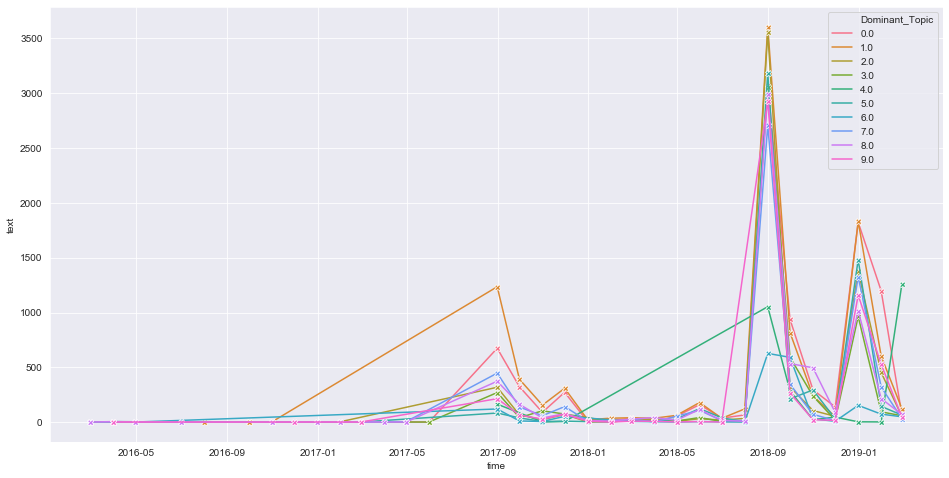

In [166]:
plt.figure(figsize=(16,8))
sns.lineplot(x='time',y='text',hue="Dominant_Topic",data=newdf,palette=sns.color_palette("husl", 10),marker='X')

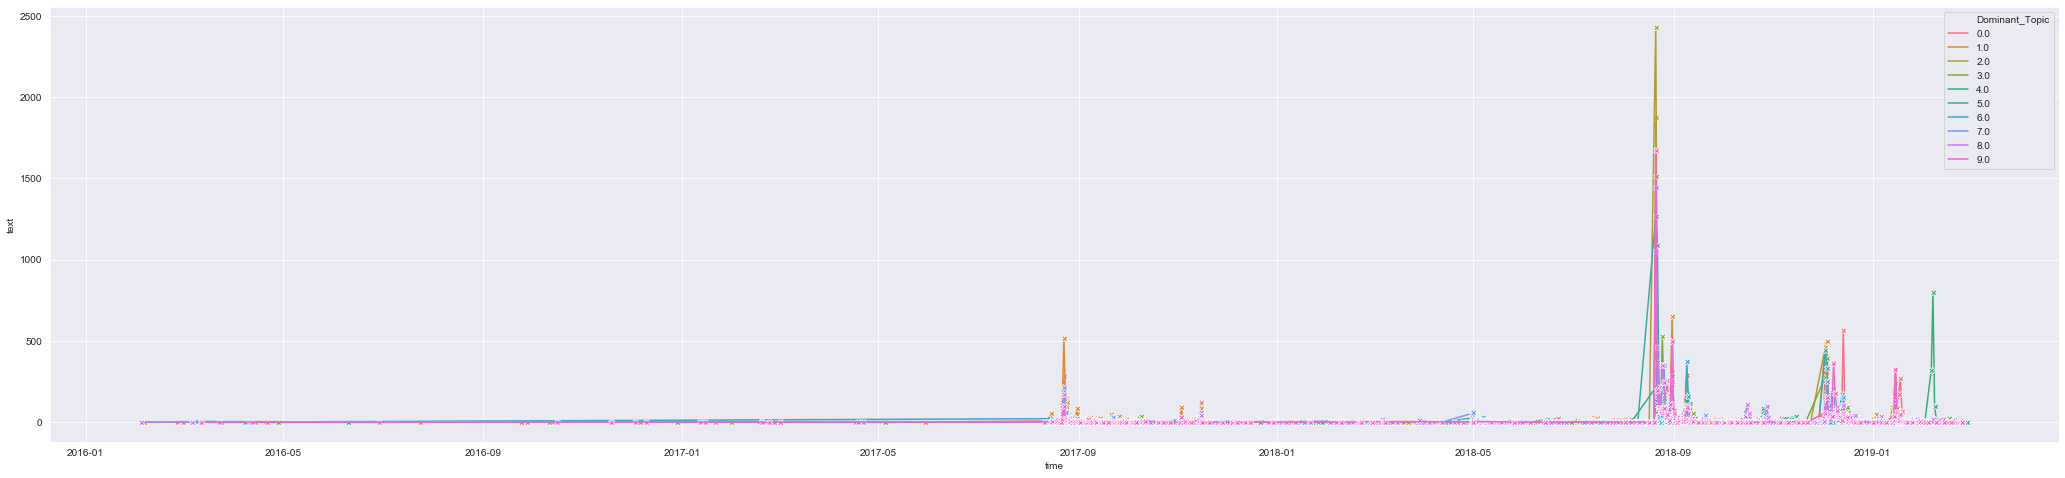

In [167]:
plt.figure(figsize=(36,8))
sns.lineplot(x='time',y='text',hue="Dominant_Topic",data=newdfd,palette=sns.color_palette("husl", 10),marker='X')

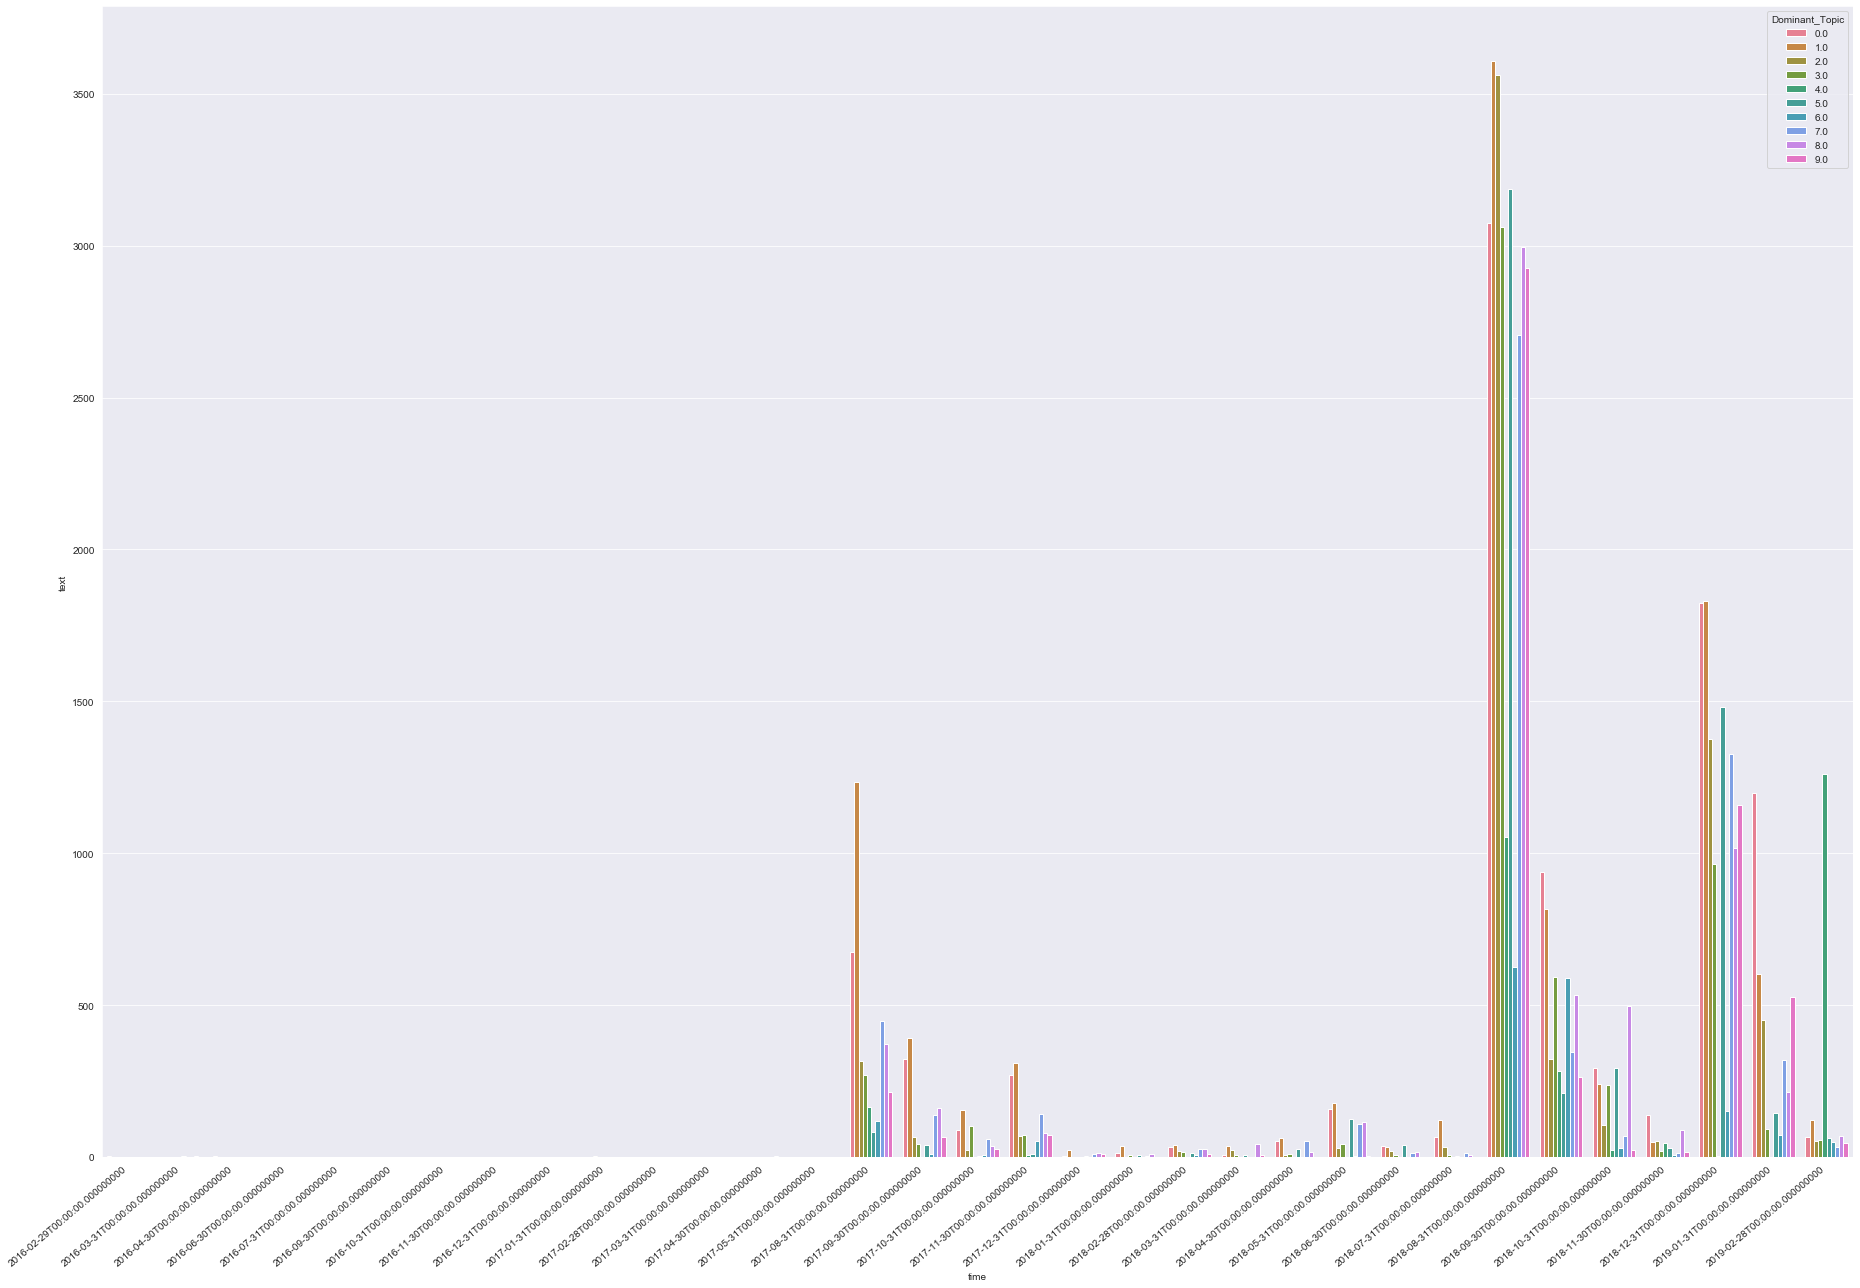

In [168]:
plt.figure(figsize=(26,18))
ax= sns.barplot(x='time',y='text',hue="Dominant_Topic",data=newdf,palette=sns.color_palette("husl", 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

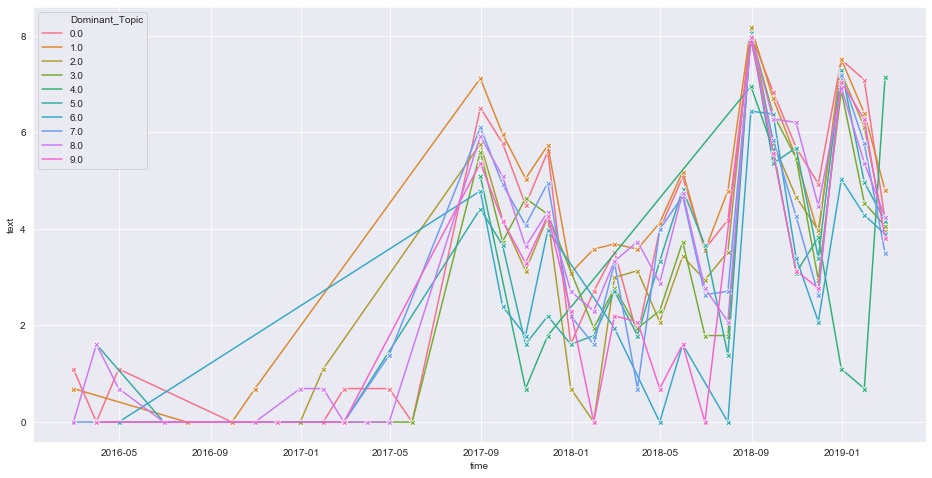

In [169]:
plt.figure(figsize=(16,8))
sns.lineplot(x=newdf.time,y=np.log(newdf.text),hue=newdf["Dominant_Topic"],palette=sns.color_palette("husl", 10),marker='X')

In [117]:
tweetwithcmmu=pd.read_csv('tweets_with_communities (1).csv').iloc[:,1:]

In [120]:
tweecomm_notna=tweetwithcmmu[tweetwithcmmu.community.notna()]

In [125]:
tweecomm_notna.time=pd.to_datetime(tweecomm_notna.time)

In [127]:
newdf2=tweecomm_notna.groupby([pd.Grouper(key='time', freq="M"),'community'])['text'].count().reset_index()

In [145]:
tweetwithcmmu.community.value_counts()[:10].index

Float64Index([1.0, 2.0, 7.0, 23.0, 4.0, 49.0, 8.0, 13.0, 10.0], dtype='float64')

In [148]:
newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)]

,time,community,text
0,2016-02-29,1.0,1
1,2016-03-31,1.0,1
2,2016-06-30,1.0,1
4,2016-08-31,1.0,3
5,2017-01-31,1.0,10
...,...,...,...
761,2019-11-30,13.0,1
764,2019-12-31,1.0,5
765,2019-12-31,2.0,2
766,2019-12-31,4.0,2


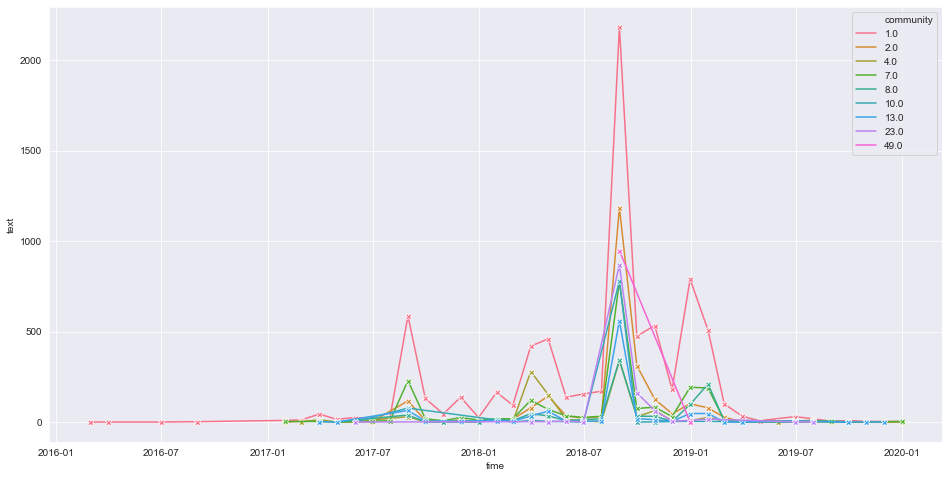

In [151]:
plt.figure(figsize=(16,8))
sns.lineplot(x='time',y='text',hue="community",data=newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)],palette=sns.color_palette("husl", 9),marker='X')

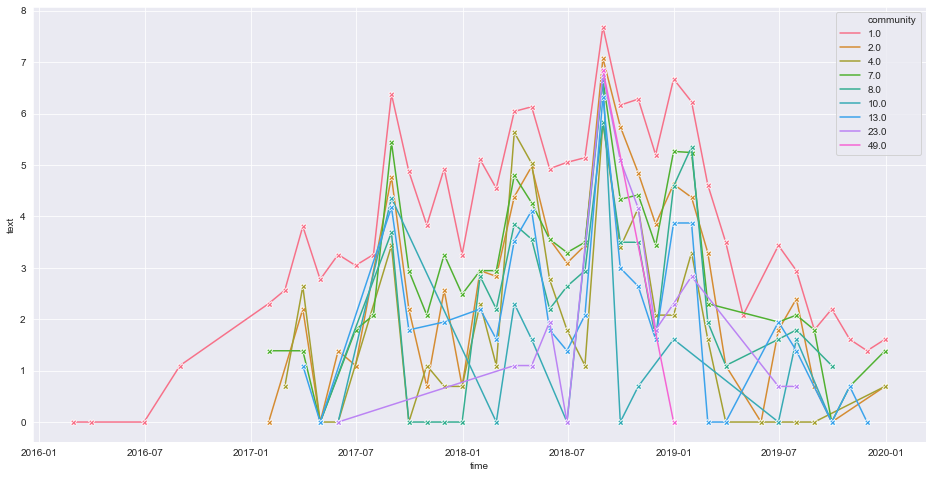

In [152]:
plt.figure(figsize=(16,8))
sns.lineplot(x=newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)].time,y=np.log(newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)].text),hue=newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)].community,data=newdf2[newdf2.community.apply( lambda x: x in tweetwithcmmu.community.value_counts()[:10].index)],palette=sns.color_palette("husl", 9),marker='X')

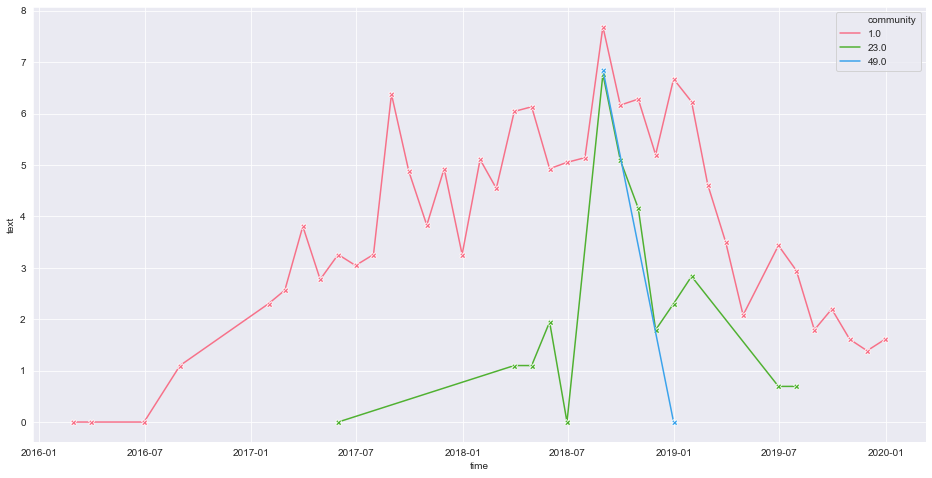

In [167]:
plt.figure(figsize=(16,8))
sns.lineplot(x=newdf2[newdf2.community.apply( lambda x: x in comlis)].time,y=np.log(newdf2[newdf2.community.apply( lambda x: x in comlis)].text),hue=newdf2[newdf2.community.apply( lambda x: x in comlis)].community,palette=sns.color_palette("husl", 3),marker='X')

In [161]:
comlis=[1,23,49]

In [1]:
import pandas as pd

In [7]:
with_topics=pd.read_csv('with_topics.csv',index_col='Unnamed: 0', parse_dates=['time'])

In [180]:
with_topics.time

0       2019-02-24 15:24:51
1       2019-02-24 06:53:50
2       2019-02-24 17:42:29
3       2019-02-24 11:18:06
4       2019-02-24 11:35:24
                ...        
59249   2016-02-04 02:48:17
59250   2016-04-07 01:48:10
59251   2016-04-28 00:57:10
59252   2016-03-12 19:01:45
59253   2016-03-06 17:41:31
Name: time, Length: 59254, dtype: datetime64[ns]

In [181]:
newdfd=with_topics.groupby([pd.Grouper(key='time', freq="D"),'Dominant_Topic'])['text'].count().reset_index()

In [182]:
newdfd

,time,Dominant_Topic,text
0,2016-02-04,1.0,1
1,2016-02-04,7.0,1
2,2016-02-04,8.0,1
3,2016-02-06,1.0,1
4,2016-02-26,0.0,2
...,...,...,...
2291,2019-02-25,9.0,1
2292,2019-02-26,0.0,1
2293,2019-02-26,5.0,1
2294,2019-02-27,2.0,1


In [183]:
pd.to_datetime('2017-08-10')

Timestamp('2017-08-10 00:00:00')

In [184]:
time1=newdfd[(newdfd['time']>pd.to_datetime('2017-08-10'))&(newdfd['time']<pd.to_datetime('2017-08-29'))]

In [185]:
time1

,time,Dominant_Topic,text
53,2017-08-11,8.0,1
54,2017-08-12,2.0,2
55,2017-08-13,1.0,1
56,2017-08-13,2.0,1
57,2017-08-13,3.0,1
...,...,...,...
160,2017-08-28,4.0,1
161,2017-08-28,5.0,1
162,2017-08-28,7.0,3
163,2017-08-28,8.0,8


In [186]:
time2=newdfd[(newdfd['time']>pd.to_datetime('2017-10-24'))&(newdfd['time']<pd.to_datetime('2017-11-13'))]

In [187]:
time3=newdfd[(newdfd['time']>pd.to_datetime('2018-04-20'))&(newdfd['time']<pd.to_datetime('2018-05-10'))]

In [188]:
time4=newdfd[(newdfd['time']>pd.to_datetime('2018-07-02'))&(newdfd['time']<pd.to_datetime('2018-07-22'))]

In [189]:
time5=newdfd[(newdfd['time']>pd.to_datetime('2018-11-24'))&(newdfd['time']<pd.to_datetime('2018-12-13'))]

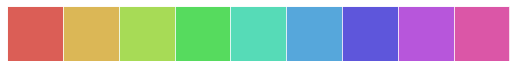

In [193]:
sns.palplot(sns.color_palette("hls", 9))

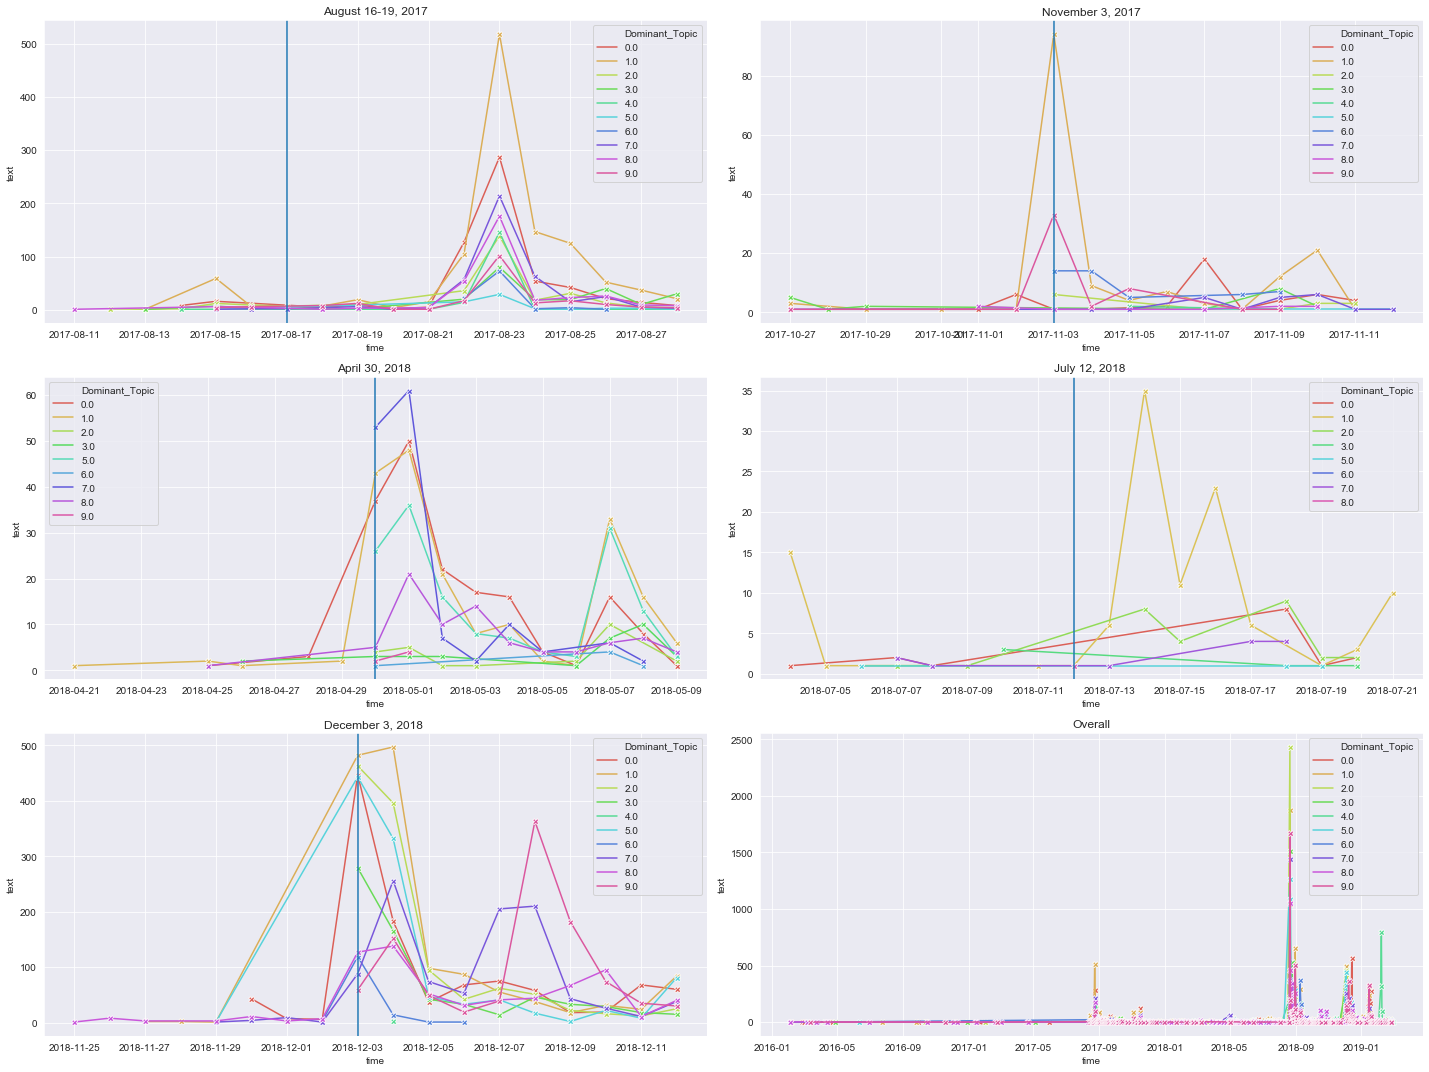

In [201]:
fig, axes =plt.subplots(ncols=2,nrows=3,figsize=(20,15))
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time1,marker='X',ax=axes[0,0], palette=sns.color_palette("hls", 10)).set_title("August 16-19, 2017")
axes[0,0].axvline(pd.to_datetime('2017-08-17'), 0)
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time2,marker='X',ax=axes[0,1], palette=sns.color_palette("hls", 10)).set_title("November 3, 2017")
axes[0,1].axvline(pd.to_datetime('2017-11-03'), 0)
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time3,marker='X',ax=axes[1,0], palette=sns.color_palette("hls", 9)).set_title("April 30, 2018 ")
axes[1,0].axvline(pd.to_datetime('2018-04-30'), 0)
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time4,marker='X',ax=axes[1,1], palette=sns.color_palette("hls", 8)).set_title("July 12, 2018 ")
axes[1,1].axvline(pd.to_datetime('2018-07-12'), 0)
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time5,marker='X',ax=axes[2,0], palette=sns.color_palette("hls", 10)).set_title("December 3, 2018 ")
axes[2,0].axvline(pd.to_datetime('2018-12-03'), 0)
sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=newdfd,marker='X',ax=axes[2,1], palette=sns.color_palette("hls", 10)).set_title("Overall")
plt.tight_layout()
plt.savefig('output.png')

In [125]:
import mpld3
mpld3.enable_notebook()

In [126]:
plt.figure(figsize=(16,8))
scatter_sns=sns.lineplot(x='time',y='text',hue='Dominant_Topic',data=time1,marker='X').set_title("August 16-19, 2017")
fig = plt.gcf()

ax = plt.gca()
pts = ax.get_children()[3]
tooltip = mpld3.plugins.PointLabelTooltip(pts, labels=list(time1.text))

mpld3.plugins.connect(fig, tooltip)
mpld3.display(fig)


In [ ]:
plt.subplot()